In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [9]:
env='Swimmer-v4'

In [10]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [11]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(1255, 17)


In [12]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(1255, 17)


In [13]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,29-05-2023 18:18:42,200,0,200,0.009941,1,201,False,30.227278,30.227278,30.227278,30.227278,30.227278,COMPER
1,1,2,Swimmer-v4,29-05-2023 18:26:40,400,0,400,0.019882,1,401,False,28.899045,29.563161,29.563161,29.563161,29.563161,COMPER
2,1,3,Swimmer-v4,29-05-2023 18:35:16,600,0,600,0.029822,1,601,False,27.510494,28.878939,28.878939,28.878939,28.878939,COMPER
3,1,4,Swimmer-v4,29-05-2023 18:44:14,800,0,800,0.039763,1,801,False,26.346959,28.245944,28.245944,28.245944,28.245944,COMPER
4,1,5,Swimmer-v4,29-05-2023 18:53:10,1000,0,1000,0.049704,1,1001,False,25.358144,27.668384,27.668384,27.668384,27.668384,COMPER
5,1,6,Swimmer-v4,29-05-2023 19:01:58,1200,0,1200,0.059645,1,1201,False,24.507481,27.141567,27.141567,27.141567,27.141567,COMPER
6,1,7,Swimmer-v4,29-05-2023 19:11:33,1400,0,1400,0.069586,1,1401,False,23.777505,26.660986,26.660986,26.660986,26.660986,COMPER
7,1,8,Swimmer-v4,29-05-2023 19:20:37,1600,0,1600,0.079526,1,1601,False,23.145343,26.221531,26.221531,26.221531,26.221531,COMPER
8,1,9,Swimmer-v4,29-05-2023 19:29:44,1800,0,1800,0.089467,1,1801,False,22.591837,25.818232,25.818232,25.818232,25.818232,COMPER
9,1,10,Swimmer-v4,29-05-2023 19:38:22,2000,0,2000,0.099408,1,2001,False,22.103971,25.446806,25.446806,25.446806,25.446806,COMPER


In [14]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,08-06-2023 13:31:58,200,201,0,0.009941,1,201,False,26.661782,26.661782,26.661782,26.661782,26.661782,DDPG
1,1,2,Swimmer-v4,08-06-2023 13:32:16,400,401,0,0.019882,1,401,False,24.489722,25.575752,25.575752,25.575752,25.575752,DDPG
2,1,3,Swimmer-v4,08-06-2023 13:32:33,600,601,0,0.029822,1,601,False,22.305485,24.485663,24.485663,24.485663,24.485663,DDPG
3,1,4,Swimmer-v4,08-06-2023 13:32:51,800,801,0,0.039763,1,801,False,20.487703,23.486173,23.486173,23.486173,23.486173,DDPG
4,1,5,Swimmer-v4,08-06-2023 13:33:09,1000,1001,0,0.049704,1,1001,False,18.991283,22.587195,22.587195,22.587195,22.587195,DDPG
5,1,6,Swimmer-v4,08-06-2023 13:33:27,1200,1201,0,0.059645,1,1201,False,17.931257,21.811205,21.811205,21.811205,21.811205,DDPG
6,1,7,Swimmer-v4,08-06-2023 13:33:44,1400,1401,0,0.069586,1,1401,False,-4.159212,18.101146,18.101146,18.101146,18.101146,DDPG
7,1,8,Swimmer-v4,08-06-2023 13:34:02,1600,1601,0,0.079526,1,1601,False,-1.195299,15.689090,15.689090,15.689090,15.689090,DDPG
8,1,9,Swimmer-v4,08-06-2023 13:34:20,1800,1801,0,0.089467,1,1801,False,0.166428,13.964350,13.964350,13.964350,13.964350,DDPG
9,1,10,Swimmer-v4,08-06-2023 13:34:38,2000,2001,0,0.099408,1,2001,False,0.955468,12.663462,12.663462,12.663462,12.663462,DDPG


In [15]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Swimmer-v4,29-05-2023 18:18:42,200,0,200,0.009941,1,201,False,30.227278,30.227278,30.227278,30.227278,30.227278,COMPER
1,1,2,Swimmer-v4,29-05-2023 18:26:40,400,0,400,0.019882,1,401,False,28.899045,29.563161,29.563161,29.563161,29.563161,COMPER
2,1,3,Swimmer-v4,29-05-2023 18:35:16,600,0,600,0.029822,1,601,False,27.510494,28.878939,28.878939,28.878939,28.878939,COMPER
3,1,4,Swimmer-v4,29-05-2023 18:44:14,800,0,800,0.039763,1,801,False,26.346959,28.245944,28.245944,28.245944,28.245944,COMPER
4,1,5,Swimmer-v4,29-05-2023 18:53:10,1000,0,1000,0.049704,1,1001,False,25.358144,27.668384,27.668384,27.668384,27.668384,COMPER


In [16]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
246,5,247,Swimmer-v4,09-06-2023 07:43:27,49400,49401,0,0.999,1,49401,False,32.074997,19.419647,23.528440,32.075953,32.238644,DDPG
247,5,248,Swimmer-v4,09-06-2023 07:43:59,49600,49601,0,0.999,1,49601,False,32.037435,19.470525,23.662590,32.158635,32.202664,DDPG
248,5,249,Swimmer-v4,09-06-2023 07:44:31,49800,49801,0,0.999,1,49801,False,31.999637,19.520842,23.796532,32.221682,32.166295,DDPG
249,5,250,Swimmer-v4,09-06-2023 07:45:04,50000,50001,0,0.999,1,50001,True,31.961627,19.570606,23.930249,32.269702,32.129575,DDPG
250,5,251,Swimmer-v4,09-06-2023 07:45:04,50001,50002,0,0.999,2,2,True,0.092781,19.493005,23.745482,31.669326,28.909473,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

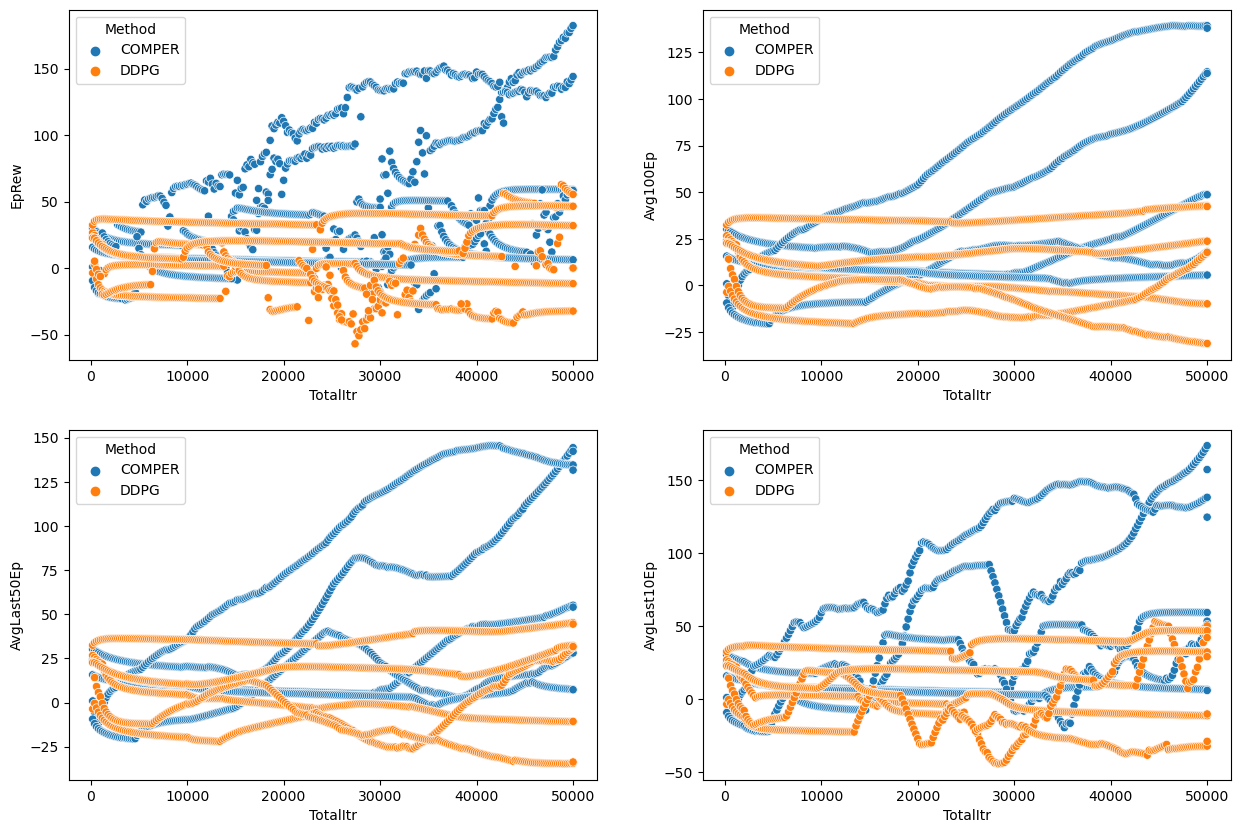

In [17]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.scatterplot(data=df, x="TotalItr", y="EpRew", hue="Method",ax=axs[0][0])
sns.scatterplot(data=df, x="TotalItr", y="Avg100Ep", hue="Method",ax=axs[0][1])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast50Ep", hue="Method",ax=axs[1][0])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast10Ep", hue="Method",ax=axs[1][1])

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

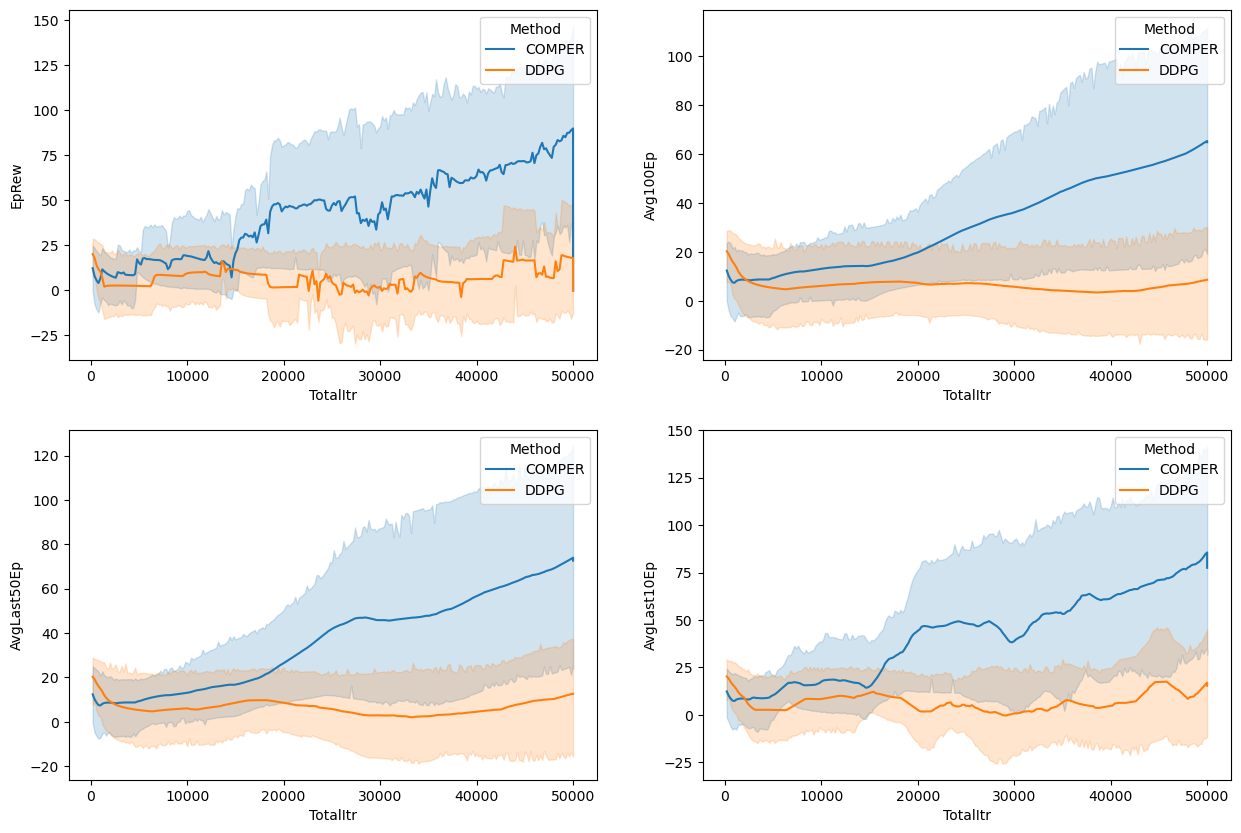

In [18]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [19]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,29-05-2023 21:57:39,Swimmer-v4,5000,0.785215,COMPER
1,1,30-05-2023 01:39:16,Swimmer-v4,10000,-1.065481,COMPER
2,1,30-05-2023 05:20:20,Swimmer-v4,15000,0.840959,COMPER
3,1,30-05-2023 09:18:18,Swimmer-v4,20000,1.998904,COMPER
4,1,30-05-2023 13:20:29,Swimmer-v4,25000,1.186195,COMPER


In [20]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,0.884420
std,1.428571,14507.211437,0.952387
min,1.000000,5000.000000,-2.068141
25%,2.000000,15000.000000,0.446476
50%,3.000000,27500.000000,1.039090
75%,4.000000,40000.000000,1.394416
max,5.000000,50000.000000,2.637003


In [21]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,08-06-2023 13:39:17,Swimmer-v4,5000,-1.470352,DDPG
1,1,08-06-2023 13:47:23,Swimmer-v4,10000,0.665952,DDPG
2,1,08-06-2023 13:56:07,Swimmer-v4,15000,-1.061405,DDPG
3,1,08-06-2023 14:05:33,Swimmer-v4,20000,0.703224,DDPG
4,1,08-06-2023 14:15:40,Swimmer-v4,25000,-0.553747,DDPG


In [22]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,0.331851
std,1.428571,14507.211437,1.105342
min,1.000000,5000.000000,-2.040133
25%,2.000000,15000.000000,-0.424524
50%,3.000000,27500.000000,0.621198
75%,4.000000,40000.000000,1.139818
max,5.000000,50000.000000,1.856078


In [23]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

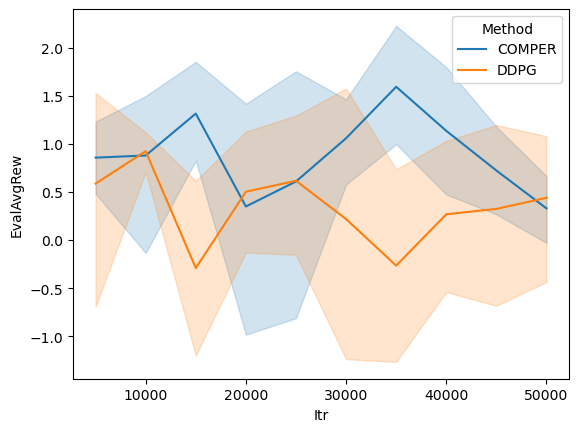

In [24]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')